In [1]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "190515_1927/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i)
    collisions.append(sim_i)
    print(sim_i)

test
(13.630993268306087, 41.9104574900854)
test
(8.570675678869378, 28.026631837094236)
test
(7.2191969488293255, 24.504593165394027)
test
(5.562296369166344, 17.950286351841356)
test
(4.207293402485224, 13.276775079345006)
test
missing expt
502
(2.8705672776947075, 9.69657057287664)
test
missing expt
651
missing expt
652
missing expt
653
missing expt
654
missing expt
655
missing expt
656
missing expt
657
missing expt
658
missing expt
659
missing expt
660
missing expt
661
missing expt
667
missing expt
668
missing expt
669
missing expt
670
missing expt
671
missing expt
672
missing expt
673
missing expt
674
missing expt
675
missing expt
676
missing expt
677
(9.755825087775296, 28.669998009933835)
test
(4.489985011581959, 14.36449581925812)
test
(3.872708990356049, 11.535414749102063)
test
(3.141534705503374, 9.186428361730579)
test
(2.5860762870098695, 6.749538837712371)
test
missing expt
1107
missing expt
1199
(1.6512451040281722, 4.518899028519271)


In [2]:
expt_start=1000
expt_end=1001
df_outputs = pd.read_csv(path+data+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
rxn14_tot = list()
print("test")
for expt_num, row in df_outputs.iterrows():
    rxn14_count = 0
    if(expt_num>=expt_start and expt_num<expt_end):
        try:
            my_cols=["time","rxn","x","y","z","reactantA","reactantB","productA","productB"]
            
            df = pd.read_csv(path+data+row[0],delimiter=" ",header=None, names=my_cols)
            df=df[['time','reactantA','reactantB']]
            df=df.sort_values(['reactantA', 'time'])
            print(df)
            reactantA = '-1'
            reactantB = '-1'
            repeat=0
            for _, row in df.iterrows():
                if(row["reactantA"]==reactantA and row["reactantB"]==reactantB):
                    repeat+=1
                else:
                    rxn14_tot.append(repeat)
                    repeat=0
                    reactantA = row["reactantA"]
                    reactantB= row["reactantB"]
        except:
            print("missing expt")
            print(expt_num)

test
              time  reactantA  reactantB
1     2.200000e-09          1         40
4     3.000000e-09          1         44
11    5.700000e-09          1         19
26    1.310000e-08          1         19
30    1.410000e-08          1         19
34    1.510000e-08          1         19
36    1.530000e-08          1         19
48    1.840000e-08          1         44
50    1.940000e-08          1         44
51    2.140000e-08          1         19
52    2.160000e-08          1         19
54    2.210000e-08          1         19
62    2.570000e-08          1         19
68    2.610000e-08          1         19
73    2.690000e-08          1         19
84    2.790000e-08          1         19
88    2.880000e-08          1         44
90    2.900000e-08          1         19
92    2.930000e-08          1         44
96    3.060000e-08          1         19
98    3.070000e-08          1         44
99    3.090000e-08          1         19
101   3.110000e-08          1         19
103   3.130

In [3]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "190516_0358/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,equalRibosomes=True,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
(10.622208811104406, 18.24991634004603)
test
(7.876129339039467, 14.301675192469538)
test
(6.9874145431945305, 13.941249923777564)
test
(5.317821485195184, 10.97233588910208)
test
(3.9675166093327383, 8.212125595879135)
test
(3.078997253278657, 6.979420979697253)
test
(7.097882083571838, 13.738215268575388)
test
(3.5667231775248243, 7.9544121862961505)
test
(3.283757170990667, 8.113395062780974)
test
(2.4330872173511766, 6.125619211762253)
test
(1.912853941739662, 4.914376225766993)
test
(1.3209466638334042, 3.108700592823437)
test
(10.622208811104406, 18.24991634004603)
test
(7.801724137931035, 13.755461281981303)
test
(6.917514124293786, 13.778322114784684)
test
(5.149203852958522, 11.062431214119833)
test
(3.9731429180432696, 8.295352780881739)
test
(3.0909657968603805, 7.457272719159218)
test
(7.097882083571838, 13.738215268575388)
test
(3.4861146496815287, 7.596453970737309)
test
(3.078621

In [5]:
phi_tot = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])
phi_crowder = np.array([0.06434998409146828, 0.08752983986220698, 0.10039264723107891, 0.10253311875190417, 0.09787505368673736, 0.08864402690993489])
dbl = [0.6,1.0,1.5,2.0,2.5,3.0]

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(phi_tot-phi_crowder,collisions[0:6],label='No crowders, all ribosomes',linewidth=4)
ax.plot(phi_tot-phi_crowder,collisions[6:12],label='Crowders, all ribosomes',linewidth=4)
ax.plot(phi_tot,collisions[12:18],label='No crowders, equal active ribosomes',linewidth=4)
ax.plot(phi_tot,collisions[18:24],label='Crowders, equal active ribosomes',linewidth=4)
ax.legend(prop={'size': 6})
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('$\phi_{tot}$',size=55color='black')
ax.set_ylabel("Average # of repeat collisions",fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=25)

collisions[6:12]


SyntaxError: invalid syntax (<ipython-input-5-8a20060485a2>, line 16)

In [6]:
phi_tot = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])
phi_crowder = np.array([0.06434998409146828, 0.08752983986220698, 0.10039264723107891, 0.10253311875190417, 0.09787505368673736, 0.08864402690993489])
dbl = [0.6,1.0,1.5,2.0,2.5,3.0]

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(dbl,collisions[6:12],label='Crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[0:6],label='No crowders, all ribosomes',linewidth=4, linestyle='--')
ax.plot(dbl,collisions[18:24],label='Crowders, equal active ribosomes',linewidth=4)
ax.plot(dbl,collisions[12:18],label='No crowders, equal active ribosomes',linewidth=4,linestyle='--'))
ax.legend()
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('Doubling rate',size=45,color='black')
ax.set_ylabel("Average # of repeat collisions",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)


SyntaxError: invalid syntax (<ipython-input-6-ae9596327810>, line 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
(23.789349808767284, 49.218682647190825)
test
(16.265948723555457, 37.64848418779796)
test
(15.006085421283949, 36.42801326986269)
test
(11.139770842174299, 29.54589548841153)
test
(8.564338298041804, 27.87038254220497)
test
(6.647506937143448, 19.17804467871367)
test
(21.635028841111694, 52.108217936771744)
test
(10.30083753168822, 33.72602952927122)
test
(8.806808493362023, 29.595626506072513)
test
(6.131258600613951, 21.947362955350613)
test
(4.520210774457464, 14.215456626529004)
test
(3.5642465660734826, 11.338058758811549)
test
(23.789349808767284, 49.218682647190825)
test
(15.755627367951861, 36.27483908154539)
test
(14.376764112903226, 35.37402542085465)
test
(10.900967728183485, 30.925241968083668)
test
(8.465747807267343, 28.858590247055712)
test
(6.482311218752703, 20.41665504685506)
test
(21.635028841111694, 52.108217936771744)
test
(10.14437129690586, 31.913556293462136)
test
(8.43

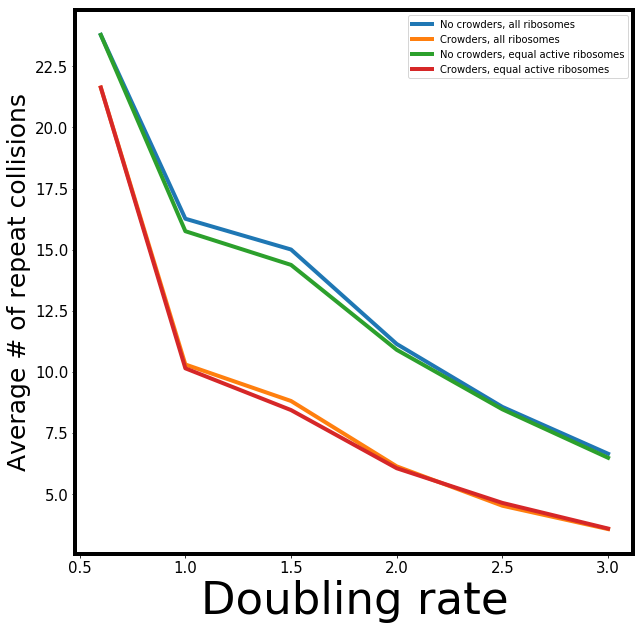

In [7]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload


#####Extra 9 overlap resolving steps for every diffusion step#######
### From ribosome view ###
path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "190529_1527/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,equalRibosomes=True,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)
    
phi_tot = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
   0.42317604])
phi_crowder = np.array([0.06434998409146828, 0.08752983986220698, 0.10039264723107891, 0.10253311875190417, 0.09787505368673736, 0.08864402690993489])
dbl = [0.6,1.0,1.5,2.0,2.5,3.0]

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(dbl,collisions[0:6],label='No crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[6:12],label='Crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[12:18],label='No crowders, equal active ribosomes',linewidth=4)
ax.plot(dbl,collisions[18:24],label='Crowders, equal active ribosomes',linewidth=4)
ax.legend()
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('Doubling rate',size=45,color='black')
ax.set_ylabel("Average # of repeat collisions",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
(1.7106969205834683, 2.859162926861741)
test
(1.5312438785504408, 2.678285979635353)
test
missing expt
237
(3.367508288701862, 47.091586847193675)
test
(2.3286872206651013, 27.65457117516052)
test
(3.379380826561643, 31.971364524435113)
test
(2.1683198076345054, 24.183981593343166)
test
(2.208855472013367, 3.746988334731698)
test
(1.7030102261270343, 3.655470806000324)
test
(1.55718820861678, 3.480274089793463)
test
(1.1507453190329031, 3.000068000325853)
test
(0.8553775743707094, 2.256371534224404)
test
(0.8172586242090223, 3.914923759555986)
test
(1.7106969205834683, 2.859162926861741)
test
(1.5515840779853778, 2.7463104872690742)
test
missing expt
237
(4.338483146067416, 45.119065727042454)
test
(2.9551848217206413, 33.33206831253776)
test
(3.338952071486596, 29.435151875275412)
test
(2.3551528878822197, 29.305932877760732)
test
(2.208855472013367, 3.746988334731698)
test
(1.6549672813801308

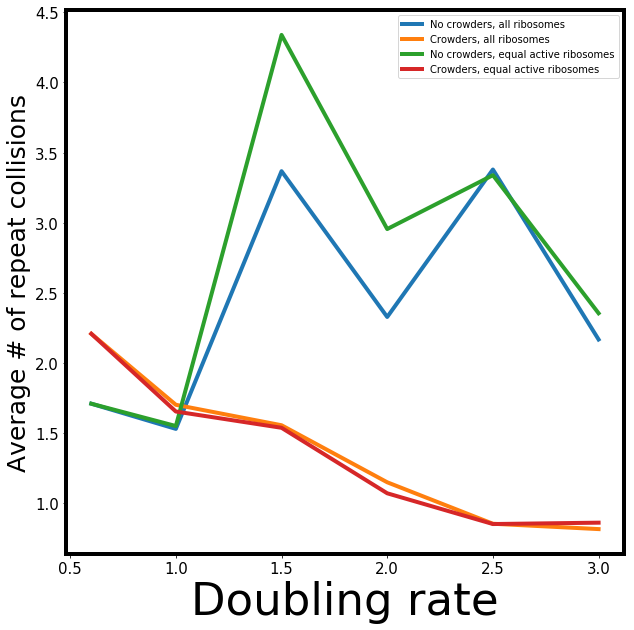

In [8]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

#####Extra 9 overlap resolving steps for every diffusion step#######
####Particles are moved an extra 5 angstroms after every collision####
### From ribosome view ###

path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "190530_0934/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,equalRibosomes=True,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)

phi_tot = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
   0.42317604])
phi_crowder = np.array([0.06434998409146828, 0.08752983986220698, 0.10039264723107891, 0.10253311875190417, 0.09787505368673736, 0.08864402690993489])
dbl = [0.6,1.0,1.5,2.0,2.5,3.0]

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(dbl,collisions[0:6],label='No crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[6:12],label='Crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[12:18],label='No crowders, equal active ribosomes',linewidth=4)
ax.plot(dbl,collisions[18:24],label='Crowders, equal active ribosomes',linewidth=4)
ax.legend()
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('Doubling rate',size=45,color='black')
ax.set_ylabel("Average # of repeat collisions",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)

In [10]:
path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "190814_0330/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatReactions(path+data,1,4,100*(i-1),100*i)
    collisions.append(sim_i)
    print(sim_i)

test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
missing expt
1093
(0.0, 0.0)
test
missing expt
1169
missing expt
1199
(0.0, 0.0)
